## Benchmarking 

Sentinel-2 image patches of 7x7 pixels for 10 bands including labels \
\
index files: https://drive.google.com/open?id=14o0eu_UN8RZW68HGR0xHA3es9p_gmuw1 \
training data: https://drive.google.com/open?id=17njNHAyoexj8WmThKfdQzVr18bevGVZ3 \
validation data: https://drive.google.com/open?id=1TtfVv4JomTJW1CKTCX2o4QgUnkoD9iu1 \
testing data: https://drive.google.com/open?id=1RwkC-KitWSeCbLpMhlq7OAlWJgtYx9PS \
\
data format: TFRecord files with featureDict format as defined below, each file containing ca. 20 samples

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
import png
import matplotlib.pyplot as plt
#import sklearn

In [2]:
tf.disable_v2_behavior()
try:
    tf.enable_eager_execution()
except Exception:
    pass

Instructions for updating:
non-resource variables are not supported in the long term


### Import and parse TFRecord data

In [3]:
## Define files' paths for TFRecord data

filenames_train = []
filenames_validate = []
filenames_test = []

no_files_train = 3000
no_files_validate = 1000
no_files_test = 1000

no_records_train = 62434
no_records_validate = 21097
no_records_test = 21189

for i in range(no_files_train):
    filenames_train.append("../data/EE_data/EE_data_training/train_patches_"+"{0:04}".format(i)+".tfrecord") 

for i in range(no_files_validate):
    filenames_validate.append("../data/EE_data/EE_data_validation/validate_patches_"+"{0:04}".format(i)+".tfrecord")
    
for i in range(no_files_validate):
    filenames_test.append("../data/EE_data/EE_data_testing/test_patches_"+"{0:04}".format(i)+".tfrecord") 
    
print(len(filenames_train))
print(len(filenames_validate))
print(len(filenames_test))

3000
1000
1000


In [37]:
## Define dictionary with features in TFRecord data

no_pixels = 7*7
no_channels = 10

bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12']
label_names = ['vegetation_elementstree_element_cover_label', \
                'vegetation_elementsshrub_element_cover_label', \
                'vegetation_elementspalm_element_cover_label', \
                'vegetation_elementsbamboo_element_cover_label', \
                'vegetation_elementscrop_element_cover_label', \
                'infrastructure_elementshouse_element_cover_label', \
                'infrastructure_elementsother_buildings_element_cover_label', \
                'infrastructure_elementspaved_road_element_cover_label', \
                'infrastructure_elementsunpaved_road_element_cover_label', \
                'water_bodieslake_water_cover_label', \
                'water_bodiesriver_water_cover_label', \
                'total_water_bodies_cover_label']

featureDict = {}
featureDict['public_id'] = tf.io.FixedLenFeature(shape=[1], dtype=tf.string)
for band in bands:
    featureDict[band] = tf.io.FixedLenFeature(shape=[7,7], dtype=tf.float32,\
                            default_value=tf.zeros([7,7], dtype=tf.float32))
for label_name in label_names:
    featureDict[label_name] = tf.io.FixedLenFeature(shape=[1], dtype=tf.float32)
#print(featureDict)

In [5]:
## Export tensorflow dataset into numpy arrays

def _parse_for_export_(serialized_example):
    example = tf.parse_single_example(serialized_example, featureDict)
    d = {}
    for band in bands:
        d[band] = example[band]
        d[band] = tf.reshape(example[band], (49,))
    for label in label_names:
        d[label] = example[label]
        d[label] = tf.cast(example[label], tf.int32)
    d['public_id'] = tf.cast(example['public_id'], tf.string)
    return d

def input_fn_export(filenames = filenames_train):
    tfrecord_dataset = tf.data.TFRecordDataset(filenames)
    tfrecord_dataset = tfrecord_dataset.map(lambda x:_parse_for_export_(x))
    return tfrecord_dataset


In [6]:
# Export training data to numpy arrays
dataset_train_for_export = input_fn_export(filenames_train)
numpy_dataset_train = list(dataset_train_for_export.as_numpy_iterator())

list_of_features_0 = [np.asarray(numpy_dataset_train[0][band], dtype=np.float32).reshape((1,-1)) for band in bands]
x_train = np.concatenate(list_of_features_0,axis = 1)
print(x_train.shape)

list_of_labels_0 = [np.asarray(numpy_dataset_train[0][label], dtype=np.int32).reshape((1,-1)) for label in label_names]
y_train = np.concatenate(list_of_labels_0,axis = 1)
print(y_train.shape)

id_train = np.asarray(numpy_dataset_train[0]['public_id'], dtype=np.unicode_).reshape((1,-1))
print(id_train.shape)

for i in range(1, no_records_train):
#for i in range(1, 30):
    new_row = np.concatenate([np.asarray(numpy_dataset_train[i][band],\
                              dtype=np.float32).reshape((1,-1)) for band in bands], axis = 1)
    x_train = np.concatenate((x_train, new_row), axis = 0)
    new_row = np.concatenate([np.asarray(numpy_dataset_train[i][label],\
                              dtype=np.int32).reshape((1,-1)) for label in label_names], axis = 1)
    y_train = np.concatenate((y_train, new_row), axis = 0)
    
    new_row = np.asarray(numpy_dataset_train[i]['public_id'], dtype=np.unicode_).reshape((1,-1))
    id_train = np.concatenate((id_train, new_row), axis = 0)
    
print(x_train.shape)
print(y_train.shape)
print(id_train.shape)


(1, 490)
(1, 12)
(1, 1)


KeyboardInterrupt: 

In [ ]:
# Export validation data to numpy arrays
dataset_validate_for_export = input_fn_export(filenames_validate)
numpy_dataset_validate = list(dataset_validate_for_export.as_numpy_iterator())

list_of_features_0 = [np.asarray(numpy_dataset_validate[0][band], dtype=np.float32).reshape((1,-1)) for band in bands]
x_validate = np.concatenate(list_of_features_0,axis = 1)
print(x_validate.shape)

list_of_labels_0 = [np.asarray(numpy_dataset_validate[0][label], dtype=np.int32).reshape((1,-1)) for label in label_names]
y_validate = np.concatenate(list_of_labels_0,axis = 1)
print(y_validate.shape)

id_validate = np.asarray(numpy_dataset_validate[0]['public_id'], dtype=np.unicode_).reshape((1,-1))
print(id_validate.shape)

for i in range(1, no_records_validate):
#for i in range(1, 30):
    new_row = np.concatenate([np.asarray(numpy_dataset_validate[i][band],\
                              dtype=np.float32).reshape((1,-1)) for band in bands], axis = 1)
    x_validate = np.concatenate((x_validate, new_row), axis = 0)
    
    new_row = np.concatenate([np.asarray(numpy_dataset_validate[i][label],\
                              dtype=np.int32).reshape((1,-1)) for label in label_names], axis = 1)
    y_validate = np.concatenate((y_validate, new_row), axis = 0)
    
    new_row = np.asarray(numpy_dataset_validate[i]['public_id'], dtype=np.unicode_).reshape((1,-1))
    id_validate = np.concatenate((id_validate, new_row), axis = 0)
    
print(x_validate.shape)
print(y_validate.shape)
print(id_validate.shape)


In [ ]:
# Export test data to numpy arrays
dataset_test_for_export = input_fn_export(filenames_test)
numpy_dataset_test = list(dataset_test_for_export.as_numpy_iterator())

list_of_features_0 = [np.asarray(numpy_dataset_test[0][band], dtype=np.float32).reshape((1,-1)) for band in bands]
x_test = np.concatenate(list_of_features_0,axis = 1)
print(x_test.shape)

list_of_labels_0 = [np.asarray(numpy_dataset_test[0][label], dtype=np.int32).reshape((1,-1)) for label in label_names]
y_test = np.concatenate(list_of_labels_0,axis = 1)
print(y_test.shape)

id_test = np.asarray(numpy_dataset_test[0]['public_id'], dtype=np.unicode_).reshape((1,-1))
print(id_test.shape)

for i in range(1, no_records_test):
#for i in range(1, 30):
    new_row = np.concatenate([np.asarray(numpy_dataset_test[i][band],\
                              dtype=np.float32).reshape((1,-1)) for band in bands], axis = 1)
    x_test = np.concatenate((x_test, new_row), axis = 0)
    
    new_row = np.concatenate([np.asarray(numpy_dataset_test[i][label],\
                              dtype=np.int32).reshape((1,-1)) for label in label_names], axis = 1)
    y_test = np.concatenate((y_test, new_row), axis = 0)
    
    new_row = np.asarray(numpy_dataset_test[i]['public_id'], dtype=np.unicode_).reshape((1,-1))
    id_test = np.concatenate((id_test, new_row), axis = 0)
    
print(x_test.shape)
print(y_test.shape)
print(id_test.shape)


In [ ]:
## Save data as numpy arrays on disk

np.save('../data/EE_data/x_train_2.npy', x_train)
np.save('../data/EE_data/y_train_".npy', y_train)
np.save('../data/EE_data/id_train_2.npy', id_train)

np.save('../data/EE_data/x_validate_2.npy', x_validate)
np.save('../data/EE_data/y_validate_2.npy', y_validate)
np.save('../data/EE_data/id_validate_2.npy', id_validate)

np.save('../data/EE_data/x_test_2.npy', x_test)
np.save('../data/EE_data/y_test_2.npy', y_test)
np.save('../data/EE_data/id_test_2.npy', id_test)


### Classification

In [8]:
## Load numpy Sentinel data with labels
x_train = np.load('../data/EE_data/x_train.npy')
y_train = np.load('../data/EE_data/y_train.npy')
id_train = np.load('../data/EE_data/id_train.npy')

x_validate = np.load('../data/EE_data/x_validate.npy')
y_validate = np.load('../data/EE_data/y_validate.npy')
id_validate = np.load('../data/EE_data/id_validate.npy')

x_test = np.load('../data/EE_data/x_test.npy')
y_test = np.load('../data/EE_data/y_test.npy')
id_test = np.load('../data/EE_data/id_test.npy')

In [ ]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import ElasticNetCV
#from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier

from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
#from sklearn.pipeline import Pipeline
#from sklearn.pipeline import make_pipeline
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler


#### benchmarking - full 10 band original data

In [43]:
## Benchmark classification of Sentinel-2 data using sklearn RandomForestClassifier

# Normalize data
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train_tr = scaler.transform(x_train)
#x_validate_tr = scaler.transform(x_validate)

# Make scorer
#acc_score=make_scorer(accuracy_score)

# Train/fit the model and predict results for different numbers of samples
no_samples_array = [100, 200, 500, 1000, 2000, 5000, 10000]
#no_samples_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000, 10000, 20000, 60000]
accuracies = []
confusion_matrices = []

clf = RandomForestClassifier(random_state=0, n_estimators=1000, bootstrap=False, class_weight='balanced')

for no_samples in no_samples_array:
    print("# of training samples: ", no_samples)
    
    #val_no_samples = min(int(no_samples/3), no_records_validate)
    val_no_samples = no_records_validate
    print("# of validation samples: ", val_no_samples)
    
    clf.fit(x_train[:no_samples, :],y_train[:no_samples,0]) #first column of y: tree cover label
    y_pred = clf.predict(x_validate[:val_no_samples,:])

    # evaluate accuracy
    acc = clf.score(x_validate[:val_no_samples,:], y_validate[:val_no_samples,0])
    accuracies.append(acc)
    print("Accuracy score: ", acc)
    
    conf_mat = confusion_matrix(y_validate[:val_no_samples,0], y_pred)
    confusion_matrices.append(conf_mat)
    print("Confusion matrix: \n", conf_mat)

# of training samples:  100
# of validation samples:  21097
Accuracy score:  0.6755936863061098
Confusion matrix: 
 [[6981  101   16  126    1   20   41  232    1 1217]
 [ 499    6    2   11    0    4   11   18    0  202]
 [ 319    3    1    7    0    4    5    8    0  141]
 [ 179    2    0    2    0    2    7    7    0  124]
 [ 187    2    0    6    0    2    4    9    0  152]
 [ 121    4    0    4    0    1    2    3    0  143]
 [ 121    5    0    4    0    0    1    4    0  145]
 [ 109    3    0    7    0    0    4    5    0  188]
 [ 214    8    0    6    1    2    7    7    0  362]
 [1372  115    3  134    0    5   43   25    1 7256]]
# of training samples:  200
# of validation samples:  21097
Accuracy score:  0.7153623737972223
Confusion matrix: 
 [[7297   27    8    0    0   12   12    7    0 1373]
 [ 511    2    1    0    0    2    2    1    0  234]
 [ 332    3    0    0    0    3    2    0    0  148]
 [ 190    1    0    0    0    1    3    0    0  128]
 [ 194    0    0    0    

In [19]:
print(no_samples_array)
print(accuracies)

[100, 200, 500, 1000, 2000, 5000, 10000]
[0.6755936863061098, 0.7153623737972223, 0.7125657676446888, 0.7184433805754372, 0.7270227994501588, 0.7341802151964735, 0.7346068161349955]


#### benchmarking - full 10 band original reordered data

In [12]:
## Benchmark classification of Sentinel-2 data using sklearn RandomForestClassifier
## with preprocessing of data

no_pixels = 7*7
no_channels = 10

# Preprocess data by reordering pixels in all 10 channels to the order of green+blue channel pixels
# by value, i.e. "greenest+bluest" pixel first, "least green+blue" last

# Training data
x_train_r = np.zeros(x_train.shape)
for i in range(x_train.shape[0]):
#for i in range(30):
    # Find order of indices by of the green channel by value
    g = x_train[i, bands.index('B3')*no_pixels : (bands.index('B3')+1)*(no_pixels)] #green channel = B3
    b = x_train[i, bands.index('B2')*no_pixels : (bands.index('B2')+1)*(no_pixels)] #blue channel = B2
    gb = np.add(g,b)
    sorted_indices = np.argsort(gb)
    for j in range(no_channels):
        for k in range(no_pixels):
            x_train_r[i,(j*no_pixels)+k] = x_train[i,(j*no_pixels)+sorted_indices[k]]
            
# Validation data
x_validate_r = np.zeros(x_validate.shape)
for i in range(x_validate.shape[0]):
#for i in range(30):
    # Find order of indices by of the green channel by value
    g = x_validate[i, bands.index('B3')*no_pixels : (bands.index('B3')+1)*(no_pixels)] #green channel = B3
    b = x_train[i, bands.index('B2')*no_pixels : (bands.index('B2')+1)*(no_pixels)] #blue channel = B2
    gb = np.add(g,b)
    sorted_indices = np.argsort(gb)
    for j in range(no_channels):
        for k in range(no_pixels):
            x_validate_r[i,j*no_pixels + k] = x_validate[i,j*no_pixels + sorted_indices[k]]


ID : ['GLU0340923']
Tree cover label : 0
All cover labels : [0 0 0 0 0 0 0 0 0 0 0 0]


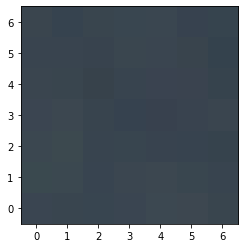

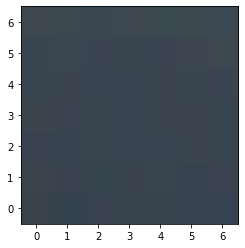

In [16]:
# Display one train image after reordering
image_id = 118
print("ID :", id_train[image_id])
print("Tree cover label :", y_train[image_id,0])
print("All cover labels :", y_train[image_id,:])

rgbArray_r = np.zeros((7,7,3))
rgbArray_r[..., 0] = x_train_r[image_id, bands.index('B4')*no_pixels:(bands.index('B4') + 1)*no_pixels].reshape((7,7))
rgbArray_r[..., 1] = x_train_r[image_id, bands.index('B3')*no_pixels:(bands.index('B3') + 1)*no_pixels].reshape((7,7))
rgbArray_r[..., 2] = x_train_r[image_id, bands.index('B2')*no_pixels:(bands.index('B2') + 1)*no_pixels].reshape((7,7))
rgbArray_r[rgbArray_r > 0.3] = 0.3
rgbArray_r = rgbArray_r / 0.3

rgbArray = np.zeros((7,7,3))
rgbArray[..., 0] = x_train[image_id, bands.index('B4')*no_pixels:(bands.index('B4') + 1)*no_pixels].reshape((7,7))
rgbArray[..., 1] = x_train[image_id, bands.index('B3')*no_pixels:(bands.index('B3') + 1)*no_pixels].reshape((7,7))
rgbArray[..., 2] = x_train[image_id, bands.index('B2')*no_pixels:(bands.index('B2') + 1)*no_pixels].reshape((7,7))
rgbArray[rgbArray > 0.3] = 0.3
rgbArray = rgbArray / 0.3
#print(rgbArray)

images = [rgbArray, rgbArray_r]

for ima in images:
    plt.figure()
    plt.imshow(ima, origin='lower')

In [14]:
## Classify for benchmarking values

no_samples_array = [100, 200, 500, 1000, 2000, 5000, 10000]
#no_samples_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000, 10000, 20000, 60000]
accuracies_r = []
confusion_matrices_r = []

clf_r = RandomForestClassifier(random_state=0, n_estimators=100, bootstrap=False, class_weight='balanced')

for no_samples in no_samples_array:
    print("# of training samples: ", no_samples)
    
    #val_no_samples = min(int(no_samples/3), no_records_validate)
    val_no_samples = no_records_validate
    print("# of validation samples: ", val_no_samples)
    
    clf_r.fit(x_train_r[:no_samples, :],y_train[:no_samples,0]) #first column of y: tree cover label
    y_pred = clf_r.predict(x_validate_r[:val_no_samples,:])

    # evaluate accuracy
    acc_r = clf_r.score(x_validate_r[:val_no_samples,:], y_validate[:val_no_samples,0])
    accuracies_r.append(acc_r)
    print("Accuracy score: ", acc_r)
    
    conf_mat_r = confusion_matrix(y_validate[:val_no_samples,0], y_pred)
    confusion_matrices_r.append(conf_mat_r)
    print("Confusion matrix: \n", conf_mat_r)

# of training samples:  100
# of validation samples:  21097
Accuracy score:  0.6774422903730388
Confusion matrix: 
 [[6972   35    7  147    6    6   87  174   10 1292]
 [ 482    6    1   15    3    0   30   18    1  197]
 [ 301    6    0   10    0    0   13   11    2  145]
 [ 173    1    0    2    0    0   11    7    0  129]
 [ 170    1    0   10    1    1    8   13    0  158]
 [ 111    4    0    6    0    2    9    4    1  141]
 [ 115    3    0    7    0    2    4    4    1  144]
 [ 105    0    0    7    0    1   11    4    0  188]
 [ 205    6    0    7    0    1   11    6    1  370]
 [1270   61    0  169    0    2  103   21   28 7300]]
# of training samples:  200
# of validation samples:  21097
Accuracy score:  0.7132767692088923
Confusion matrix: 
 [[7268    4    2    1    0    8   25    0    2 1426]
 [ 512    2    0    0    0    1    3    0    0  235]
 [ 330    0    0    0    0    1    3    0    0  154]
 [ 191    0    0    0    0    0    2    0    0  130]
 [ 193    0    1    0    

In [20]:
print(no_samples_array)
print(accuracies_r)

[100, 200, 500, 1000, 2000, 5000, 10000]
[0.6774422903730388, 0.7132767692088923, 0.7089633597193914, 0.7188699815139593, 0.7270227994501588, 0.7345594160307153, 0.735744418637721]


#### benchmarking - rgb data

In [40]:
## Benchmark classification of Sentinel-2 RGB data using sklearn RandomForestClassifier

# Train/fit the model and predict results for different numbers of samples
no_samples_array = [100, 200, 500, 1000, 2000, 5000, 10000]
#no_samples_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000, 10000, 20000, 60000]
accuracies = []
confusion_matrices = []

clf = RandomForestClassifier(random_state=0, n_estimators=100, bootstrap=False, class_weight='balanced')

#select only RGB data
x_train_rgb = x_train[:, bands.index('B2')*no_pixels:(bands.index('B4') + 1)*no_pixels]
x_validate_rgb = x_validate[:, bands.index('B2')*no_pixels:(bands.index('B4') + 1)*no_pixels]

for no_samples in no_samples_array:
    print("# of training samples: ", no_samples)
    
    #val_no_samples = min(int(no_samples/3), no_records_validate)
    val_no_samples = no_records_validate
    print("# of validation samples: ", val_no_samples)
    
    clf.fit(x_train_rgb[:no_samples, :],y_train[:no_samples,0]) #first column of y: tree cover label
    y_pred = clf.predict(x_validate_rgb[:val_no_samples,:])

    # evaluate accuracy
    acc = clf.score(x_validate_rgb[:val_no_samples,:],\
                    y_validate[:val_no_samples,0])
    accuracies.append(acc)
    print("Accuracy score: ", acc)
    
    conf_mat = confusion_matrix(y_validate[:val_no_samples,0], y_pred)
    confusion_matrices.append(conf_mat)
    print("Confusion matrix: \n", conf_mat)

# of training samples:  100
# of validation samples:  21097
Accuracy score:  0.675830686827511
Confusion matrix: 
 [[6830   84   16  169   38   36   77   44   13 1429]
 [ 531    5    1    7    0    1   15    4    0  189]
 [ 328    1    1    1    2    7    9    4    1  134]
 [ 201    2    2    0    3    3    8    3    0  101]
 [ 197    1    0    4    4    3   11    3    1  138]
 [ 134    1    4    3    0    1    8    2    2  123]
 [ 143    2    1    2    2    0    6    0    1  123]
 [ 128    1    1    4    1    2    5    1    1  172]
 [ 226    3    1    2    0    2   14    1    2  356]
 [1279   57    0   84    6    8   90    1   21 7408]]
# of training samples:  200
# of validation samples:  21097
Accuracy score:  0.6957387306252074
Confusion matrix: 
 [[7311    0    7    4    0   17    2    3    3 1389]
 [ 557    0    2    0    0    1    0    0    1  192]
 [ 358    0    0    0    0    4    0    1    0  125]
 [ 220    0    0    0    0    0    1    1    0  101]
 [ 224    0    0    0    0